<img src="../../code/Resources/cropped-SummerWorkshop_Header.png"> 

<h1 align="center">Workshop 1: Tutorial on neuronal decoding and behavior</h1> 
<h3 align="center">Summer Workshop on the Dynamic Brain</h3> 
<h3 align="center">Thursday, August 26th, 2025</h3> 
<h4 align="center">Day 2</h4> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# 0.0 Neural Coding 

Neural coding describes how neurons represent information about the world. Coding can be studied by asking whether external or internal events lead to changes in neural activity (<b>encoding</b>), or by asking whether different types of information can be read out from neural activity (<b>decoding</b>). In this workshop we will focus on this later problem. Specifically, we will try to read out information about stimulus identity from neurons recorded during the Dynamic Routing Task. 

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### 0.1 The 'visual change detection' task

For an example today to start to understand encoding and decoding, we are going to look at the dataset including the visual change detection task. Allen folks like to refer to this as the "Visual Behavior Task" dataset.

There is a very nice description of this task in the <b> data book </b>. Lets start by reminding ourselves how this task works:

https://allenswdb.github.io/physiology/stimuli/visual-behavior/VB-Behavior.html#change-detection-task

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### 0.2 Our questions 

- How can we decode information from neurons and populations of neurons
- How do we decide if our decoding is any good?
- Can we use these tools to learn something about neural dyanimcs in visual cortex?


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# 1.0 Setup

To Python, we first need packages Lets start with some you are familiar with. <b>Numpy</b>, <b>pandas</b>, and <b>matplotlib</b> should be favorites of yours by now. In addition, lets grab your new friend <b>pynwb</b> so that we can actually look some data!



In [21]:
# Lets start by importing some basic packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

# pynwb is for reading python NWB files
import pynwb

pd.set_option('display.max_columns', None)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


We also need to point our computer to the data. This will depend a bit on how you choose to do your compute. For CodeOcean, the platform is <i> 'amzn'</i>


In [22]:
import platform
from pathlib import Path
platstring = platform.platform()

if 'Darwin' in platstring:
    # macOS 
    data_root = Path("/Volumes/Brain2023/")
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = Path("E:/")
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = Path("/data/")
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = Path("/media/$USERNAME/Brain2025/")

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.1 An example session.

We will all use the same one to get started. 

In [23]:
example_session = 1139846596 # Other good ones to play with: 1152811536, 1069461581
this_session = str(example_session)
this_filename = f'ecephys_session_{this_session}.nwb'
nwb_path = data_root/'visual-behavior-neuropixels'/'behavior_ecephys_sessions'/this_session/this_filename
print(nwb_path)
# And read the nwb
session = pynwb.NWBHDF5IO(nwb_path).read()

/data/visual-behavior-neuropixels/behavior_ecephys_sessions/1139846596/ecephys_session_1139846596.nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


In [24]:
# Lets take a look at the session object.
session

Data type,float64
Shape,"(569455, 2)"
Array size,8.69 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(569455,)"
Array size,4.34 MiB
Chunk shape,None


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.2 The trials table

Remember that the trial table lists all the per-trial event data.

In [25]:
# get trials data
trials = session.trials.to_dataframe()
trials.iloc[20:25]

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
id,,,,,,,,,,,,,,,,,,,,
20,127.51039,128.22770,im114_r,im114_r,False,NaN,False,False,"[127.72725, 127.82693, 127.9268]",NaN,NaN,0.000,False,False,False,False,True,False,-99,0.71731
21,128.26083,136.28438,im114_r,im114_r,False,132.01398,False,True,[135.46642],135.46642,NaN,0.000,False,False,False,True,False,False,6316,8.02355
22,136.51756,144.54133,im114_r,im034_r,True,140.27132,True,False,"[140.80537, 140.90426, 140.98797, 141.07109, 1...",140.80537,140.80537,0.003,True,False,False,False,False,False,6811,8.02377
23,144.77455,152.04772,im034_r,im111_r,True,147.77765,True,False,[],NaN,NaN,0.000,False,False,True,False,False,False,7261,7.27317
24,152.28082,159.55401,im111_r,im034_r,True,155.28374,True,False,"[155.91832, 156.01695, 156.11699, 156.21713, 1...",155.91832,155.91832,0.003,True,False,False,False,False,False,7711,7.27319


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.3 Stimulus table(s)

But wait...We were trying to decode images.

The 'trials' table for this task is designed around the change task structure. However, there are other ways to look at these data- for example, by image presentations, by flash presentations, etc. 

These data are stored in the 'intervals' section of the nwb.

In [26]:
stimuli = session.intervals['Natural_Images_Lum_Matched_set_ophys_H_2019_presentations'].to_dataframe()

In [27]:
stimuli.head()

,start_time,stop_time,stimulus_block,image_name,duration,start_frame,end_frame,is_change,is_image_novel,omitted,flashes_since_change,trials_id,is_sham_change,stimulus_name,active,stimulus_index,rewarded,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,27.705472,27.955683,0,im104_r,0.250212,60,75,0.0,0.0,0.0,0,0,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(63, 15, timestamps pynwb.base.TimeSeries at ..."
1,28.456107,28.706318,0,im104_r,0.250212,105,120,0.0,0.0,0.0,1,0,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(108, 15, timestamps pynwb.base.TimeSeries at..."
2,29.206725,29.456928,0,omitted,NaN,150,165,0.0,NaN,1.0,1,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(153, 15, timestamps pynwb.base.TimeSeries at..."
3,29.957343,30.207555,0,im104_r,0.250212,195,210,0.0,0.0,0.0,2,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(198, 15, timestamps pynwb.base.TimeSeries at..."
4,30.707978,30.958187,0,im104_r,0.250208,240,255,0.0,0.0,0.0,3,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(243, 15, timestamps pynwb.base.TimeSeries at..."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There are both active and passive stimuli in this table. For now, lets only look at active trials. Trying to distinguish between these cases might be a good place to start a project, later! 

Read more about the task strucutre here: https://allenswdb.github.io/physiology/ephys/visual-behavior/VB-Neuropixels.html#experiment-design

In [28]:
active_stimuli = stimuli[stimuli.active == True]
# passive_stimuli = stimuli[stimuli.active == False]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Visualize the stimulus table

Lets plot the information in the stimulus table to get a better sense of how its organized.

In [29]:
# Lets take a moment to highlight my favorite numpy command!
# Get the stimulus shown for each spike trial
unq_stim,stim_id, = np.unique(active_stimuli.image_name,return_inverse = True)
print(unq_stim)
print(stim_id[:10])

['im005_r' 'im024_r' 'im034_r' 'im083_r' 'im087_r' 'im104_r' 'im111_r'
 'im114_r' 'omitted']
[5 5 8 5 5 8 5 5 5 5]


/tmp/ipykernel_254/4284106813.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('tab10',


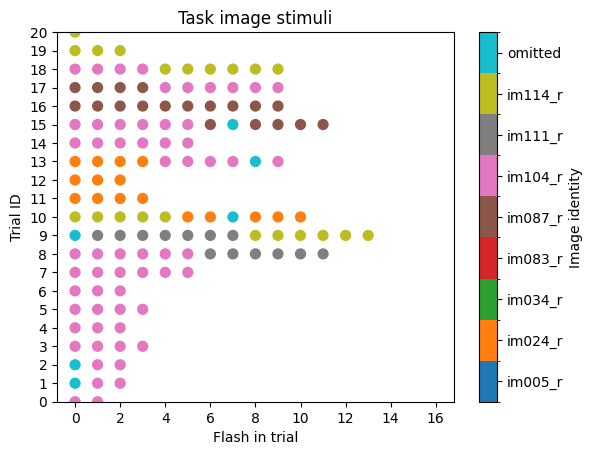

In [30]:
# Create a new plot. We need a tall one for this.
fig,ax = plt.subplots()

# This is just some fancy code to make the discrete colors work
cmap = mpl.cm.get_cmap('tab10', 
                       len(unq_stim))

norm = mpl.colors.BoundaryNorm(boundaries=np.arange(len(unq_stim)+1)-0.5,
                               ncolors=len(unq_stim))

# Count the index of each flash in each trial
_,trl_idx,trl_counts = np.unique(active_stimuli.trials_id,return_inverse=True,return_counts = True)
event_indices = np.zeros_like(trl_idx)
for i in range(len(trl_counts)):
    event_indices[trl_idx == i] = np.arange(trl_counts[i])

# The actual plotting code
z = ax.scatter(event_indices,
               trl_idx,
               s = 50,
               c = stim_id.T,
               cmap = cmap,
               norm = norm
              )

# Label stuff!
ax.set_xlabel('Flash in trial')
ax.set_ylabel('Trial ID')
ax.set_ylim([0,stimuli.trials_id.values[-1]])
ax.set_title('Task image stimuli')

# Get the color key
tick_locs = np.arange(len(unq_stim))
cbar = plt.colorbar(z, ticks=tick_locs)
cbar.set_label('Image identity')
cbar.set_ticklabels(unq_stim)

ax.set_ylim([0,20])
ax.set_yticks(np.arange(0,21));

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.4 The units table

Now that we have our stimuli, we need unit information! Just as the trials table contains information about each trial, the "units" table contains a good chunk of information about each unit!. Lets take a look.

In [31]:
# get units table 
units_table = session.units.to_dataframe()
units_table.head()

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,local_index,max_drift,nn_hit_rate,nn_miss_rate,peak_channel_id,presence_ratio,quality,recovery_slope,repolarization_slope,silhouette_score,snr,spread,velocity_above,velocity_below,waveform_duration,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1153690205,0.576369,61.301370,0.500000,297,364.80,-3.288139,1.885465,1.244942,43.828135,0.031664,291,26.18,0.712000,0.007792,1153687797,0.99,good,-0.026886,0.208681,0.084777,1.668842,100.0,0.529792,-0.412060,0.453266,"[4.978706099783888, 5.606636812116187, 5.67203...","[5.258530367795638e-05, 5.035715215189419e-05,...","[[0.0, 0.06210749999999991, 0.1198275000000002..."
1153690204,0.493414,116.816798,0.011591,296,187.73,-6.672418,1.581412,3.397615,83.330837,0.000211,290,30.83,0.983015,0.000585,1153687797,0.99,good,-0.068704,0.478412,0.110647,2.985683,90.0,2.197655,0.343384,0.329648,"[17.761086079091864, 19.73531117195231, 23.427...","[0.00014464103624885002, 0.0001232437919471667...","[[0.0, -0.11417250000000034, 0.366990000000000..."
1153689917,0.392061,113.863718,0.266193,11,158.62,-4.794188,32.554848,0.006637,96.626192,0.001420,11,9.25,0.994000,0.001925,1153687558,0.99,good,-0.119497,0.446882,0.140409,2.874502,20.0,0.000000,NaN,0.206030,"[4.832440043635988, 4.997472688118269, 5.17737...","[0.00010121183403697306, 0.0001656440311754964...","[[0.0, 0.6785025000000011, 0.7694700000000014,..."
1153690052,0.318786,149.869687,0.000141,144,318.03,-2.898115,5.910581,0.005656,65.988995,0.002364,141,48.88,0.965625,0.001825,1153687708,0.99,good,-0.032764,0.485802,0.125111,1.881085,100.0,-0.040879,-0.343384,0.521943,"[4.848806641987998, 4.903106415339167, 5.04063...","[0.0001602942811898057, 0.0001684167124952415,...","[[0.0, 0.02018249999999938, 0.5085599999999999..."
1153690046,0.500452,186.491955,0.000154,137,14.39,8.562108,1.954942,0.020679,159.963266,0.000039,135,8.71,0.996337,0.000303,1153687708,0.23,good,-0.074716,0.673994,0.164031,2.729600,40.0,0.686767,0.343384,0.274707,"[4129.2008248101865, 4129.206958117919, 4129.2...","[0.0001760438715969058, 0.00017667237816278424...","[[0.0, 0.2307824999999999, 0.37703249999999994..."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
<h3> How many units are in the units table?? </h3>
    

In [32]:
# solution
len(units_table)

2274

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.5 Where are our units??

The units table doesn't actually tell us where are units were recorded from (it does in some dataset, just not this one). Instead, it stores the electrode id of the peak channel that that unit was recorded from. Where were these channels? for that we need to look at the electrodes table.



In [33]:
electrodes_table = session.electrodes.to_dataframe()
electrodes_table.head(2)

,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,probe_channel_number,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
1153687533,MRN,probeA abc.EcephysElectrodeGroup at 0x14007530...,probeA,20,43,1140043047,0,True,8632.0,3810.0,7246.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153687534,MRN,probeA abc.EcephysElectrodeGroup at 0x14007530...,probeA,20,11,1140043047,1,True,8630.0,3799.0,7250.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Data in the electrodes table are organized by unique channel identifiers. This setup allows us to do a dataframe join on the peak_channel_id from the units table. The result of this operation will be a table that contains all of the unit information, PLUS the electrode information for the key-ed channel.



In [34]:
units_electrode_table = units_table.join(electrodes_table,on = 'peak_channel_id')
print('Lenght before join: ' + str(len(units_table)))
print('Lenght after join: ' + str(len(units_electrode_table)))

Lenght before join: 2274
Lenght after join: 2274


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
<h3> Take a look at the units table. </h3>

Can you find which brain area each unit is localized to now? hint: use .head or .iloc

In [35]:
units_electrode_table.head(5)

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,local_index,max_drift,nn_hit_rate,nn_miss_rate,peak_channel_id,presence_ratio,quality,recovery_slope,repolarization_slope,silhouette_score,snr,spread,velocity_above,velocity_below,waveform_duration,spike_times,spike_amplitudes,waveform_mean,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,probe_channel_number,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1153690205,0.576369,61.301370,0.500000,297,364.80,-3.288139,1.885465,1.244942,43.828135,0.031664,291,26.18,0.712000,0.007792,1153687797,0.99,good,-0.026886,0.208681,0.084777,1.668842,100.0,0.529792,-0.412060,0.453266,"[4.978706099783888, 5.606636812116187, 5.67203...","[5.258530367795638e-05, 5.035715215189419e-05,...","[[0.0, 0.06210749999999991, 0.1198275000000002...",VISam,probeA abc.EcephysElectrodeGroup at 0x14007530...,probeA,2580,11,1140043047,257,True,8004.0,687.0,7772.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153690204,0.493414,116.816798,0.011591,296,187.73,-6.672418,1.581412,3.397615,83.330837,0.000211,290,30.83,0.983015,0.000585,1153687797,0.99,good,-0.068704,0.478412,0.110647,2.985683,90.0,2.197655,0.343384,0.329648,"[17.761086079091864, 19.73531117195231, 23.427...","[0.00014464103624885002, 0.0001232437919471667...","[[0.0, -0.11417250000000034, 0.366990000000000...",VISam,probeA abc.EcephysElectrodeGroup at 0x14007530...,probeA,2580,11,1140043047,257,True,8004.0,687.0,7772.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153689917,0.392061,113.863718,0.266193,11,158.62,-4.794188,32.554848,0.006637,96.626192,0.001420,11,9.25,0.994000,0.001925,1153687558,0.99,good,-0.119497,0.446882,0.140409,2.874502,20.0,0.000000,NaN,0.206030,"[4.832440043635988, 4.997472688118269, 5.17737...","[0.00010121183403697306, 0.0001656440311754964...","[[0.0, 0.6785025000000011, 0.7694700000000014,...",MB,probeA abc.EcephysElectrodeGroup at 0x14007530...,probeA,260,43,1140043047,24,True,8585.0,3543.0,7331.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153690052,0.318786,149.869687,0.000141,144,318.03,-2.898115,5.910581,0.005656,65.988995,0.002364,141,48.88,0.965625,0.001825,1153687708,0.99,good,-0.032764,0.485802,0.125111,1.881085,100.0,-0.040879,-0.343384,0.521943,"[4.848806641987998, 4.903106415339167, 5.04063...","[0.0001602942811898057, 0.0001684167124952415,...","[[0.0, 0.02018249999999938, 0.5085599999999999...",CA1,probeA abc.EcephysElectrodeGroup at 0x14007530...,probeA,1720,27,1140043047,171,True,8259.0,1805.0,7828.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153690046,0.500452,186.491955,0.000154,137,14.39,8.562108,1.954942,0.020679,159.963266,0.000039,135,8.71,0.996337,0.000303,1153687708,0.23,good,-0.074716,0.673994,0.164031,2.729600,40.0,0.686767,0.343384,0.274707,"[4129.2008248101865, 4129.206958117919, 4129.2...","[0.0001760438715969058, 0.00017667237816278424...","[[0.0, 0.2307824999999999, 0.37703249999999994...",CA1,probeA abc.EcephysElectrodeGroup at 0x14007530...,probeA,1720,27,1140043047,171,True,8259.0,1805.0,7828.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.6 Unit QC

Thats a lot of units. But do we trust them all?

The truth is, one of the biggest challenges with ephy analysis sorting units and figuring out which are safe to use. Neuropixels, by virtue of having many contacts near eachother, make it possible to record many units simultaniously. This is great, but it creates an additional challenge of knowing which units are "good" for analysis. Because large recordings are almost always sorted algorithmically, selecting good units is particularly important because no human has manually identified which units are safe for further analysis.

The units table contains many unit QC metrics. Typically, rather than just blindly trusting every output of the automated sorting, we typically impose some constraints on the data. Here are a few examples of useful ones:

+ isi_violations_ratio: what fraction of spikes happen closer together than should be possible for a neuron. If this is too high, its a sign of eather non-neuronal noise or more than one neuron getting merged into a unit.
+ amplitude_cutoff: An estimate of the fraction of spikes missed by the sorter, based on the amplitude historgram for the neuron.
+ presence_ratio: recordings are not 100% static. If the there is mechanical drift, the unit won't be present for the entire session. This adds all sorts of problems for analysis down the road - how can you compare accorss sessions if your unit comes or goes between them? we therefore want to use only units that we can follow through the recording.

Note that exactly which unit QC criteria you use may very based on the questions you ask. Have a question that doesn't really depend on well isolated neurons? Try loosening these criteria. Need to know about the differences of well-isolated units over a long timescale? try tightening them. As a starting place, though, these numbers are reasonable. If you want to get fancy, more information about QC critria can be found here: https://spikeinterface.readthedocs.io/en/stable/modules/qualitymetrics.html 

In [42]:
# QC criteria? 
good_units = units_electrode_table[
    (units_electrode_table.isi_violations<.5) &
    (units_electrode_table.amplitude_cutoff<.1) &
    (units_electrode_table.presence_ratio>.95)
    ]
print(len(good_units))


892


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
<h3> How many 'good' VISp neurons do we have?? </h3>

np.unique has a handy "return_counts" option. Try using it to count the good VISp neurons. Never used this command before? Try using "shift+tab" to see the help menu!
    

In [101]:
# Another fun feature of np.unique
unq,counts = np.unique(good_units.location,return_counts= True)
unq

array(['APN', 'CA1', 'CA3', 'DG', 'LP', 'MB', 'MGd', 'MGm', 'MGv', 'MRN',
       'PIL', 'PoT', 'ProS', 'SCig', 'SUB', 'TH', 'VISal', 'VISam',
       'VISl', 'VISp', 'VISpm', 'VISrl'], dtype=object)

In [44]:
# How many good VISp neurons does this leave us with??
counts[list(unq).index('VISp')]

np.int64(84)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 1.7 Select an area to analyis



In [39]:
this_structure_units_table  = good_units[good_units.location == 'VISp']
len(this_structure_units_table)

84

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 2 Can we decode stimulus identity from a single neuron?

Its time to look at our first neuron! (WOOT!)

You are going to hear this many times over the next to weeks: In this course, we will fit many models with increasing levels of abstraction to our data. It is always going to be tempting to jump straight into modeling, and gloss over the actual data. Don't be tempted to do this! Looking at and understanding your  data is, at the end of the day, alway more important than whatever model you might fit. After all, if your data are bad, so is your model.

Fortunately, someone here has already done a good chunk of the quality control on our data. So here, "data" really means the spike times for a given unit.

With this in mind, lets look at the activity of a single neuron as the mouse is presented with its stimulus. First, we need some data.


In [46]:
# Choose a neuron to start.
unit = 6
# Get the spike times for this neuron
spike_times = this_structure_units_table.spike_times.values[unit]
print(spike_times)


[6.73136611e+00 1.39199152e+01 1.52790786e+01 ... 9.48929837e+03
 9.48932874e+03 9.48943410e+03]


In [47]:
# and get the times that the stimulus presentation started
stim_times=  active_stimuli.start_time.values
print(stim_times[:10])

[27.70547161 28.45610676 29.20672504 29.95734332 30.70797847 31.45860332
 32.20924004 32.95987176 33.71048161 34.46110926]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 2.1 Rasters and PSTHs

What we what to know right now is, how does this neuron respond to a stimulus?

To answer this, we need to grab a window of time around the when the stimulus was presented. We will then look at the only the spikes that happen within this window. 

We are going to make two types of plots to visualize these data. 

+ The first we call a <i> raster </i> plot. Here, we will represent each spike by a dot, and each trial as a row in our plot.
+ The raster plot is useful for visualizing activity across trials, but it can be difficult to quantify. With this in mind, we will also make a <i> Peristimulus Time Histogram </i> or <i> PSTH </i>. This is the averaged stimulus triggered average for the neuron or, equivalently, a histogram showing the average of the raster plot.

In [48]:
# Define a stimulus window.
pre_window  = .2 # How far before the stimulus should we look?
post_window = .75 # How far after the stimulus should we look?
bin_size = .01 # What size bins do we want for our PSTH?
bins = np.arange(-pre_window,post_window+bin_size,bin_size) # Set up bins
bin_centers = bins[:-1]+bin_size/2
# Storage for data.
triggered_spike_times = []
triggered_stim_index = []

# Loop through the stimuli!!
for i, stim_time in enumerate(stim_times):
    # Select spikes that fall within the time window around this stimulus
    mask = ((spike_times >= stim_time - pre_window) & 
            (spike_times < stim_time + post_window))
    
    # Align spike times to stimulus onset (0 = stimulus)
    trial_spikes = spike_times[mask] - stim_time

    triggered_spike_times.append(trial_spikes)
    triggered_stim_index.append(np.ones(len(trial_spikes))*i)

# triggered_spike_times now has the times of each spike per trial.  
print(triggered_spike_times[:3])
# triggered_trial_index is for keeping track of which trial this spike was from
print(triggered_stim_index[:3])

[array([0.05477655, 0.0785765 , 0.12057639, 0.22727613]), array([0.04887292, 0.05423957, 0.09150615, 0.10690611, 0.16027265]), array([], dtype=float64)]
[array([0., 0., 0., 0.]), array([1., 1., 1., 1., 1.]), array([], dtype=float64)]


In [49]:
# For plotting, we are going to want to concatenate these data into one big vector
triggered_spike_times = np.concatenate(triggered_spike_times)
triggered_stim_index = np.concatenate(triggered_stim_index)

Text(0, 0.5, 'Spike Rate (Hz)')

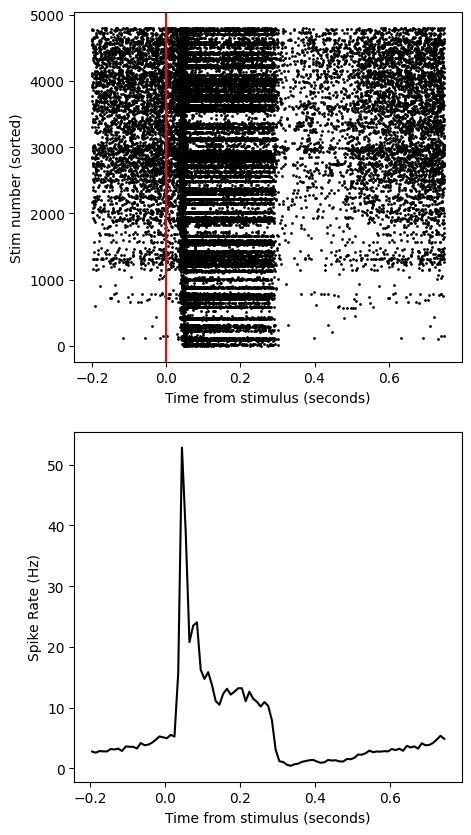

In [50]:

# Instantiate a plot
fig,ax = plt.subplots(nrows = 2,figsize =(5,10))

# Plot the raster! Its just dots, so we use scatter.
# The 'k' here is a shoutout to all the matlab users...
ax[0].scatter(triggered_spike_times,triggered_stim_index,s = 1,c = 'k')
ax[0].set_xlabel('Time from stimulus (seconds)')
ax[0].set_ylabel('Stim number (sorted)')
ax[0].axvline([0],c = 'r')

# and make the histogram.
a,b = np.histogram(triggered_spike_times,bins = bins)
# Divide by # of trials, then bin size to get a rate estimate in Spikes/Sec = Hz
a = a/np.max(triggered_stim_index)/bin_size
ax[1].plot(bin_centers,a,c = 'k')
ax[1].set_xlabel('Time from stimulus (seconds)')
ax[1].set_ylabel('Spike Rate (Hz)')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Great! We have a neuron that responds to the stimulus!

But remember our goal here- we want to know if we can decode the difference between stimuli from this neuron. With that in mind, lets try seperating out the different stimulus identities.

Recall that we did this before using numpy's <b> unique </b> function. Selecting return_inverse will give a easy way to sort the trial identities.

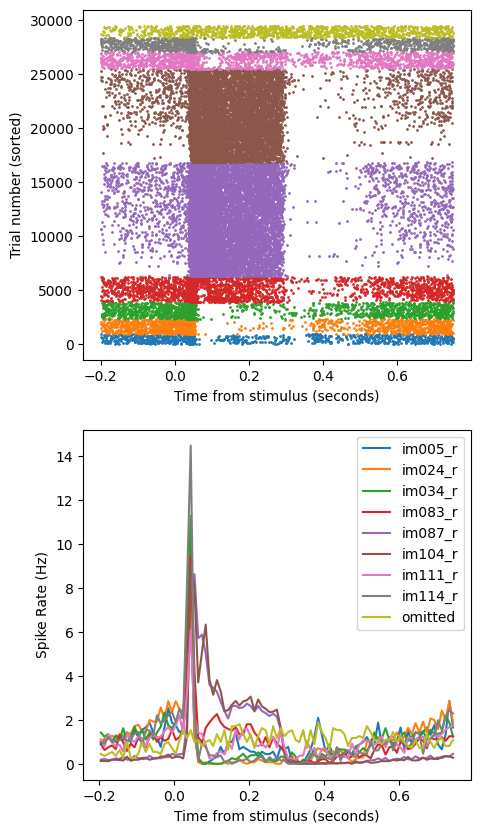

In [51]:

fig,ax = plt.subplots(nrows = 2,figsize =(5,10))

# A counter, useful for stacking plots
counter = 0

# Loop through trial types
for ii in range(len(unq_stim)):
    # Plot the raster just for this stimulus type
    
    # spike times for this trial type
    this_triggered_spike_times = triggered_spike_times[stim_id[triggered_stim_index.astype(int)]==ii]

    # trial index subselected by this trial type.
    this_trl_idx = np.arange(np.sum(stim_id[triggered_stim_index.astype(int)]==ii))

    # Plot
    ax[0].scatter(this_triggered_spike_times,counter + this_trl_idx,s = 1)
    ax[0].set_xlabel('Time from stimulus (seconds)')
    ax[0].set_ylabel('Trial number (sorted)')

    # stack the plots
    counter +=np.max(this_trl_idx)
    
    # Plot the raster just for this stimulus type
    a,b = np.histogram(this_triggered_spike_times,bins = bins)
    a = a/np.max(this_trl_idx)/bin_size
    ax[1].plot(bin_centers,a,label = unq_stim[ii]) # Note that we are labeling each plot
    ax[1].set_xlabel('Time from stimulus (seconds)')
    ax[1].set_ylabel('Spike Rate (Hz)')
ax[1].legend() # Plot a legend using the established labels.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 2.2 Linear Classifier
So far these data are promising - on average, the neuron doesn't respond the same way on every trial.

We are now ready to use a mathematical model to see if we decode stimulus identity from this neuron. Note that, despite these promising averages, this many not be a guarantee - the variability across trials may still make this very difficult.

For now, we will start with a linear classifier. Specifically, we will use <b>sklearn</b>'s implementation of a <i>Support Vector Classifier</i>, or <i>SVC</i>. These are part of a broader class of algorithms known as a <i> Support Vector Machine (SVM) </i>. Importantly, this means we have officially made it to the machine learning part of the course. Yay!




In [52]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

A linear classifier will, in effect, attempt to find a linear divider to separate to different classes of data. 

A SVC is a type of <i> supervised </i> classifier. This means that it is trained to do classification using data that have known labels.

Before we get to the neural data, lets work through a simple example of what this all means with some fake data.

Text(0, 0.5, '# Samples')

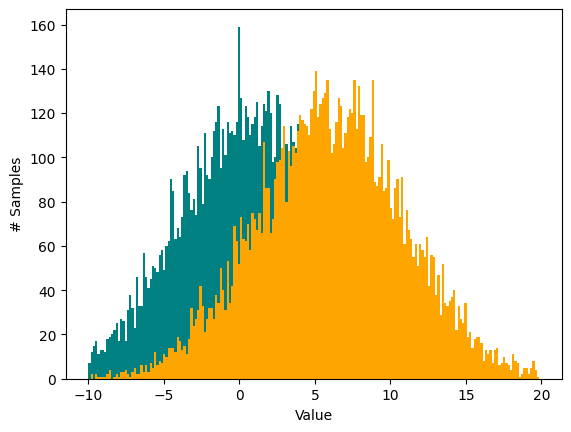

In [53]:
# Get some randomly generated data
x_1 = np.random.normal(loc = 1,scale = 5,size = 10000)
x_2 = np.random.normal(loc = 6,scale = 5,size = 10000)
# Class identities
y_1 = np.ones(x_1.shape)
y_2 = np.ones(x_2.shape)*2

# make these into one big vector
x = np.concatenate([x_1,x_2])
y = np.concatenate([y_1,y_2])

# Plot them!
fig,ax = plt.subplots()
tmp_bins = np.arange(-10,20,.15)
ax.hist(x_1,tmp_bins,color= 'teal')
ax.hist(x_2,tmp_bins,color = 'orange')
ax.set_xlabel('Value')
ax.set_ylabel('# Samples')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

One important thing to note here is that we are passing labeled data in an effort to learn the distinction between classes. This is a great way to build a model, but it comes with risks- because we are training our model using these data, it would not be fair to evaluate model performance using the same data.

In cases where we don't want to go out and colect more data, we can split our data into "training" and "testing." <b>Sklearn</b> provides a handy function for doing this called "train_test_spilt."


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now we are ready to fit our model. Again, <b>sklearn</b> provides a useful interface for this.

Note: In this tutorial we are using SVC. However, one of the nice things about <b>sklearn</b> is that that it uses a standardized interface for all of its model fits. This makes it very easy to play with different classifiers, model types, etc.!

In [55]:
# Create a model fitting object
svc = LinearSVC()
svc

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [56]:
# SVC requires inputs be a certain shape. 
# When using 1-d arrays, we need to some reshaping to follow this convention
svc.fit(x_train.reshape(-1, 1),y_train.ravel())

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now that we have this model, we can use it to predict new data. One way of doing this is to our held out data, and see how well we did.

In [57]:
y_prediction = svc.predict(x_test.reshape(-1, 1))
score = np.sum(y_prediction==y_test)/(len(y_test))
score

np.float64(0.705)

In [58]:
# This can also be acomplished using the built in "score" function
svc.score(x_test.reshape(-1, 1),y_test)

0.705

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Alternatively, we can pass in x values to find out what class would have been predicted. This can be very useful for understanding how our model is actually doing its classification. 

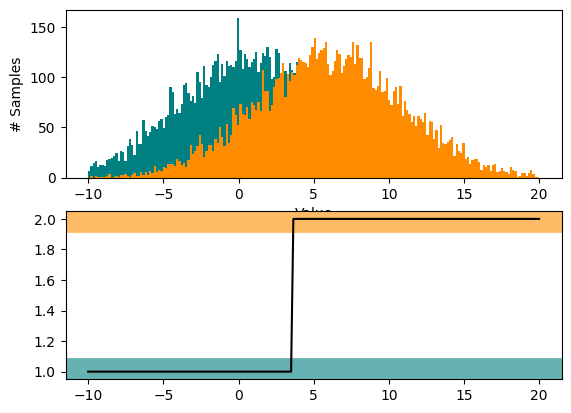

In [59]:
# numbers to test
tmp_bins = np.arange(-10,20.15,.15)

# Plot our origional distributions
fig,ax = plt.subplots(nrows = 2)
ax[0].hist(x_1,tmp_bins,color= 'teal')
ax[0].hist(x_2,tmp_bins,color = 'darkorange')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('# Samples')

# 
bins_prediction = svc.predict(tmp_bins.reshape(-1,1))
ax[1].axhline(1,color=  'teal',linewidth = 20,alpha = .6)
ax[1].axhline(2,color= 'darkorange',linewidth = 20,alpha = .6)
ax[1].plot(tmp_bins,bins_prediction,'k')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 2.3 Now lets try with our neuron!!

The challenge, of course, is that our neural data is high dimensional. To keep things interpretable, lets try to small window from the overall spike train that will give us a decent chance of decoding information from this neuron.

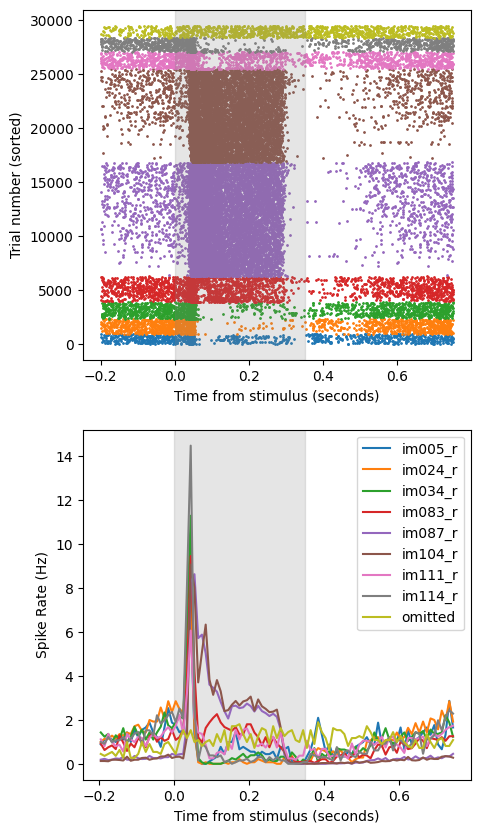

In [60]:
fig,ax = plt.subplots(nrows = 2,figsize =(5,10))

# A counter, useful for stacking plots
counter = 0
for ii in range(len(unq_stim)):
    # spike times for this trial type
    this_triggered_spike_times = triggered_spike_times[stim_id[triggered_stim_index.astype(int)]==ii]

    # trial index subselected by this trial type.
    this_trl_idx = np.arange(np.sum(stim_id[triggered_stim_index.astype(int)]==ii))

    ax[0].scatter(this_triggered_spike_times,counter + this_trl_idx,s = 1)


    # stack the plots
    counter += np.max(this_trl_idx)
    
    # Plot the raster just for this stimulus type
    a,b = np.histogram(this_triggered_spike_times,bins = bins)
    a = a/np.max(this_trl_idx)/bin_size
    ax[1].plot(bin_centers,a,label = unq_stim[ii]) # Note that we are labeling each plot
    ax[1].set_xlabel('Time from stimulus (seconds)')
    ax[1].set_ylabel('Spike Rate (Hz)')

ax[0].axvspan(xmin = 0,xmax = .35,color = 'Gray',alpha = .2)
ax[0].set_xlabel('Time from stimulus (seconds)')
ax[0].set_ylabel('Trial number (sorted)')
ax[1].axvspan(xmin = 0,xmax = .35,color = 'Gray',alpha = .2)
ax[1].legend() # Plot a legend using the established labels.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can start by counting the number of spikes for each trial type within this window. We will then go about fitting a linear classier to attempt to decode trial type from number of spikes within our window!

/tmp/ipykernel_254/2366503810.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


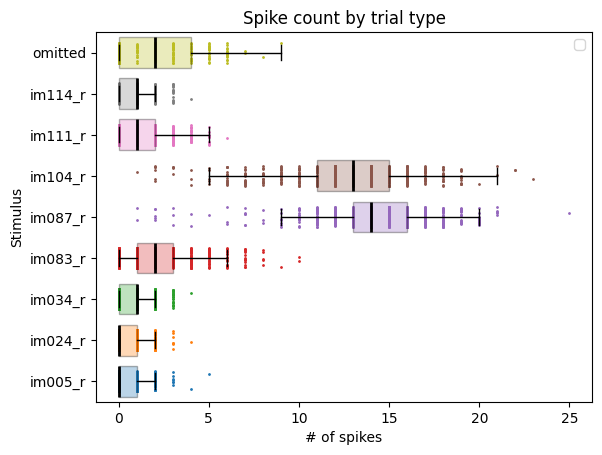

In [61]:
spike_times = this_structure_units_table.spike_times.values[unit]
stim_times = active_stimuli.start_time

start= 0
stop = .350

spike_count = []
trial_index = []

for i, stim_time in enumerate(stim_times):
    # Select spikes that fall within the time window around this stimulus
    mask = ((spike_times >= stim_time + start) & 
            (spike_times < stim_time + stop))
    
    # Count spikes in this bin
    spike_count.append(len(spike_times[mask]))
    
spike_count = np.array(spike_count)
trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(active_stimuli.image_name.values,return_inverse=  True)

# Get information for manual control of colors
prop_cycle = plt.rcParams['axes.prop_cycle']
color_list = [entry['color'] for entry in prop_cycle]

fig,ax = plt.subplots()
for jj in range(9):
    ax.scatter(spike_count[trial_id==jj],np.random.random(len(spike_count[trial_id==jj]))/2+jj-.25,s = 1)
    box = ax.boxplot(spike_count[trial_id==jj],
                        positions = [jj],widths=[.75],
                        showfliers=False,vert= False,
                        patch_artist = True,
                        medianprops=dict(color="black", linewidth=2))
    box['boxes'][0].set_facecolor(color_list[jj])
    box['boxes'][0].set_alpha(.3)

ax.set_yticklabels(unq_stim,rotation = 0)
ax.set_xlabel('# of spikes')
ax.set_ylabel('Stimulus')
ax.set_title('Spike count by trial type')
ax.legend()

In [62]:
# Just as before, we need to split out data.
x_train,x_test,y_train,y_test = train_test_split(spike_count,trial_id)

# Note that we are using the same x = predictor, y = class 
# label convention that we were using before. 
print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (3602,)
y train shape: (3602,)
x test shape: (1201,)
y test shape: (1201,)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
<h3> Ready? </h3>
Go ahead and fit a linear SCV to the training data!

In [63]:
# Make a new model
svc = LinearSVC()
# Fit with data!
svc.fit(x_train.reshape(-1,1),y_train.ravel());

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Try passing a few spike rates to your shiny new model </h3> 

How do things compare to the histogram we just made?


In [70]:
# Now lets try it
svc.predict(np.array([5]).reshape(-1,1))

array([5])

/tmp/ipykernel_254/2870807558.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


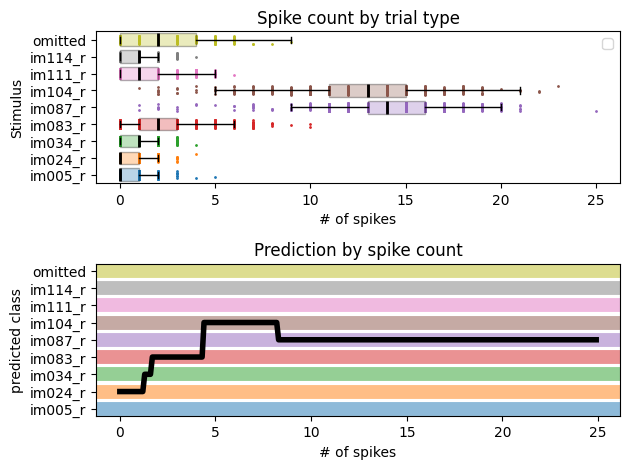

In [71]:
import matplotlib as mpl
prop_cycle = plt.rcParams['axes.prop_cycle']
color_list = [entry['color'] for entry in prop_cycle]

input_spike_count = np.arange(0,np.max(spike_count),.1) 
predicted_class = svc.predict(input_spike_count.reshape(-1,1))
fig,ax = plt.subplots(nrows = 2)


for jj in range(9):
    ax[0].scatter(spike_count[trial_id==jj],np.random.random(len(spike_count[trial_id==jj]))/2+jj-.25,s = 1)
    box = ax[0].boxplot(spike_count[trial_id==jj],
                        positions = [jj],widths=[.75],
                        showfliers=False,vert= False,
                        patch_artist = True,
                        medianprops=dict(color="black", linewidth=2))
    box['boxes'][0].set_facecolor(color_list[jj])
    box['boxes'][0].set_alpha(.3)


ax[0].set_yticklabels(unq_stim,rotation = 0)
ax[0].set_xlabel('# of spikes')
ax[0].set_ylabel('Stimulus')
ax[0].set_title('Spike count by trial type')
ax[0].legend()

for ii in range(len(unq_stim)):
    ax[1].axhline(ii,c = color_list[ii],linewidth=10,alpha = .5)
ax[1].plot(input_spike_count,predicted_class,'k',linewidth = 4)
ax[1].set_yticks(np.arange(9))
ax[1].set_yticklabels(unq_stim,rotation = 0)
ax[1].set_xlabel('# of spikes')
ax[1].set_ylabel('predicted class')
ax[1].set_title('Prediction by spike count')


fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

But how good is this model, really?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Compute the model score on your held out testing data</h3> 

Is this good? Is it better than "chance"


In [72]:
# Get the predictions for our held out test data
prediction = svc.score(x_test.reshape(-1,1),y_test.ravel())

In [73]:
# Find the model score
score = svc.score(x_test.reshape(-1,1),y_test.ravel())
score

0.3105745212323064

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Is this any good? When examining the answer to that question, it is probably most useful to ask, "how much better was our classifier than if we had just guessed by chance".

In cases where you have evenly distributed classes, chance estimates are easy. For example, if we just had 8 evenly distributed classes, chance performance would be 1/8. 

However, we don't have exactly even numbers of trials: there are, for example, fewer omission trials. The mouse also spent more time struggling with some stimuli than others. In cases like this, we can sometimes estimate a "chance" figure by asking, "if we shuffled trial identities, what fraction of the time would they line up with the true trial identity."

In [74]:
chance_est = []
for ii in range(1000):
    shuffled_trial_id = trial_id[np.random.randint(len(trial_id))]
    chance_est.append(np.sum(trial_id==shuffled_trial_id)/len(trial_id))

chance  =np.mean(chance_est)
print(f'Chance estimate: {chance}')

Chance estimate: 0.11605996252342285


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

It is worth saying that, because we have more than one class, we can dig a little deeper into our prediction.

Specifically, when we guess incorrectly, miss-classifications often have structure to them. A confusion matrix is a useful tool to understand mistakes a classifier makes. Here we plot, given a "true" class, what was the distribution of predictions made by our classifier.

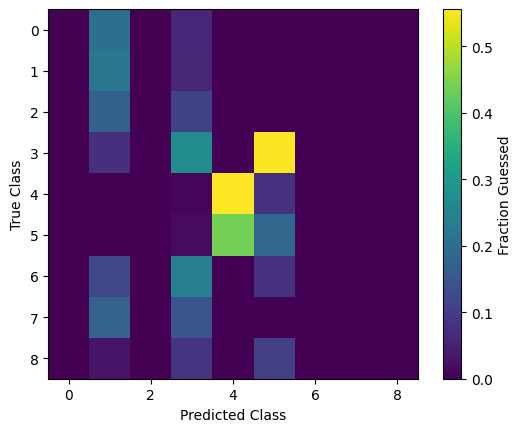

In [75]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(x_test.reshape(-1,1))

fig,ax = plt.subplots()
im  = ax.imshow(confusion_matrix(y_true=y_test, y_pred=prediction, normalize='pred'))
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
cbar = plt.colorbar(im)
cbar.set_label('Fraction Guessed')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Compare the confusion matrix to the histogram for this neuron </h3> 

Can you understand why the classifier is making the errors that it is?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 3.0 Now for a neural population.

While the mathematical formalism is useful to understand what our chosen neuron is doing here, if we are being honest its probably overkill for understanding this single neurons activity. There are, in fact, whole classes of regression models that might be better suited for asking what information a neuron encodes. 

Why, then, have we spent so much time on this example? Decoding gives us a mathematical way to look at what information we can extract from a neural population. As this population becomes larger, however, it can become increasingly difficult to visualize and intuit what our decoder is doing under the hood. Starting with this one-dimension example will help with intuition as we move to this harder case.


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

With that said, lets use decoding to take a hard look at the timescale of VISPs' encoding of stimulus identity. 

Doing this is going to require a fair bit of data wrangling. Just as before, we needed to get the number of spikes per trial. But if we are looking over time and over neurons, we need to get the number of spikes for each neuron on each trial. 

Here is one way to do this, though you will notice that it is a little on the slow side.

In [76]:
%%timeit -n 1 -r 1

n_neurons = len(this_structure_units_table.spike_times.values)
stim_times = active_stimuli.start_time


bins = np.arange(-.2,.5,.05)
storage = np.empty((n_neurons,len(stim_times),len(bins)-1))

for nn in range(n_neurons):
    spike_times = this_structure_units_table.spike_times.values[nn]

    spike_count = []
    trial_index = []
    
    for i, stim_time in enumerate(stim_times):
        # Select spikes that fall within the time window around this stimulus

        mask = ((spike_times >= stim_time + np.min(bins)) & 
                (spike_times < stim_time + np.max(bins)))
        
        # Align spike times to stimulus onset (0 = stimulus)
        trial_spikes,_ = np.histogram(spike_times[mask] - stim_time,bins)
        
        spike_count.append(trial_spikes)
    
    storage[nn,:,:] = np.array(spike_count)
trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(active_stimuli.image_name.values,return_inverse=  True)

33.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This code is actually pretty hard to follow. It would be more readable if we converted the core piece of it into a function:

In [79]:
def get_binned_triggered_spike_times(spike_times,stim_times,bins):
    spike_count = []
    trial_index = []
    
    for i, stim_time in enumerate(stim_times):
        # Select spikes that fall within the time window around this stimulus
        
        mask = ((spike_times >= stim_time + np.min(bins)) & 
                (spike_times < stim_time + np.max(bins)))
        
        # Align spike times to stimulus onset (0 = stimulus)
        trial_spikes,_ = np.histogram(spike_times[mask] - stim_time,bins)
        
        spike_count.append(trial_spikes)
    return np.array(spike_count)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

You will notice, though, that this is a nice way to organize our code, but it won't actually make anything go any faster.

Now, we are going to give you the *fast* version of this function. If you end up working with triggered spike trains much during this course, the difference in time here can be pretty meaningful.

In [80]:
def get_binned_triggered_spike_counts_fast(spike_times, stim_times, bins):
    """
    Fast peri-stimulus time histogram using searchsorted.

    Parameters
    ----------
    spike_times : 1D array_like, sorted
        Times of all spikes (e.g. in seconds).
    stim_times : 1D array_like
        Times of stimulus onsets.
    bins : 1D array_like
        Bin edges *relative* to stimulus (e.g. np.linspace(-0.1, 0.5, 61)).

    Returns
    -------
    counts : 2D ndarray, shape (n_trials, len(bins)-1)
        counts[i, j] is the number of spikes in bin j of trial i.
    """
    # ensure numpy arrays
    spike_times = np.asarray(spike_times)
    stim_times = np.asarray(stim_times)
    bins = np.asarray(bins)

    # If your spike_times isn't already sorted, uncomment:
    # spike_times = np.sort(spike_times)

    n_trials = stim_times.size
    n_bins = bins.size - 1
    counts = np.zeros((n_trials, n_bins), dtype=int)

    for i, stim in enumerate(stim_times):
        # compute the absolute edges for this trial
        edges = stim + bins
        # find the insertion indices for each edge
        idx = np.searchsorted(spike_times, edges, side='left')
        # differences between successive indices = counts per bin
        counts[i, :] = np.diff(idx)

    return counts

In [81]:
%%timeit -n 1 -r 1
n_neurons = len(this_structure_units_table.spike_times.values)
stim_times = stimuli.start_time


bins = np.arange(-.2,.5,.1)
storage = np.empty((n_neurons,len(stim_times),len(bins)-1))

for nn in range(n_neurons):
    spike_times = this_structure_units_table.spike_times.values[nn]

    spike_count = []
    trial_index = []

    storage[nn,:,:]  = get_binned_triggered_spike_counts_fast(spike_times,stim_times,bins)

trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(stimuli.image_name.values,return_inverse=  True)

4.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The %%timeit is preventing the above code from saving inputs, so lets run this fast version one more time for real

In [82]:
n_neurons = len(this_structure_units_table.spike_times.values)
stim_times = active_stimuli.start_time


bins = np.arange(-.2,.75,.1)
storage = np.empty((n_neurons,len(stim_times),len(bins)-1))

for nn in range(n_neurons):
    spike_times = this_structure_units_table.spike_times.values[nn]

    spike_count = []
    trial_index = []

    storage[nn,:,:]  = get_binned_triggered_spike_counts_fast(spike_times,stim_times,bins)

trial_index = np.arange(len(spike_count))
trial_id_types,trial_id = np.unique(active_stimuli.image_name.values,return_inverse=  True)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


Now, even though we binned at a higher temporal rate than before, we can still fit a classifier that is analogous to our single-neuron version.


In [83]:
stimulus_change_number = active_stimuli.flashes_since_change.values

Model score: 0.9493670886075949


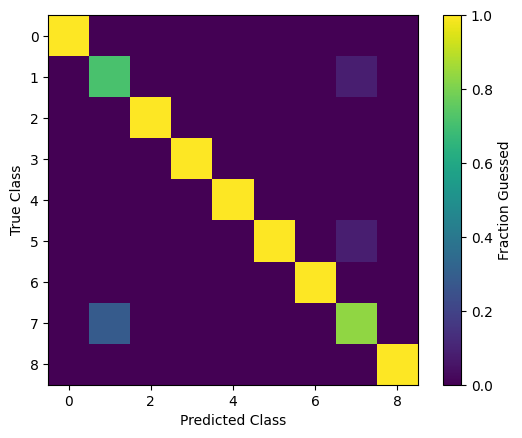

In [84]:
change_number = 0

# Select a time window to use for decoding
inc_time_idx = np.where((bins>.1) & (bins<.3))[0] # select times to include
start_idx = np.min(inc_time_idx)
end_idx = np.max(inc_time_idx)

# Find the number of spikes in the selected window
X = np.sum(storage[:,stimulus_change_number==change_number,start_idx:end_idx],axis=2).T 
# And the trial identity for each of the selected stimuli
y = trial_id[stimulus_change_number==change_number]

# Spit the data
x_train,x_test,y_train,y_test = train_test_split(X,y)

# Fit the model
svc = LinearSVC()
svc.fit(x_train,y_train)
print(f'Model score: {svc.score(x_test,y_test)}')

# make and plot the confusion matrix
prediction = svc.predict(x_test)
fig,ax = plt.subplots()
im  = ax.imshow(confusion_matrix(y_true=y_test, y_pred=prediction, normalize='pred'))
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
cbar = plt.colorbar(im)
cbar.set_label('Fraction Guessed')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### 3.1 Timescale of population dynamics  

What this means is that we can, using all of our VISp neurons, <b>very</b> reliably decode stimulus identity. This is, in and of itself, pretty exciting. But we can use our new decoding technique to dig deeper into the behavior of the neural population within our chosen time window.

To do this, we can loop through a fit a model to each time bin. Once we have that model, we can compute the score for each model using both the training and testing partitions in our dataset.

In [90]:
score_train = np.zeros(len(bins)-1)
score_test = np.zeros(len(bins)-1) 

# Loop through and fit a model to each time bin.
for ii in range(len(bins)-1):
    svc = LinearSVC()

    # Find the number of spikes in the selected window
    X = storage[:,stimulus_change_number==change_number,ii].T
    # And the trial identity for each of the selected stimuli
    y = trial_id[stimulus_change_number==change_number]
        
    x_train,x_test,y_train,y_test = train_test_split(X,y)
    svc.fit(x_train,y_train)
    # Find score on both the training and the test data.
    score_train[ii] = svc.score(x_train,y_train)
    score_test[ii] = svc.score(x_test,y_test)

Text(0, 0.5, 'Model Score')

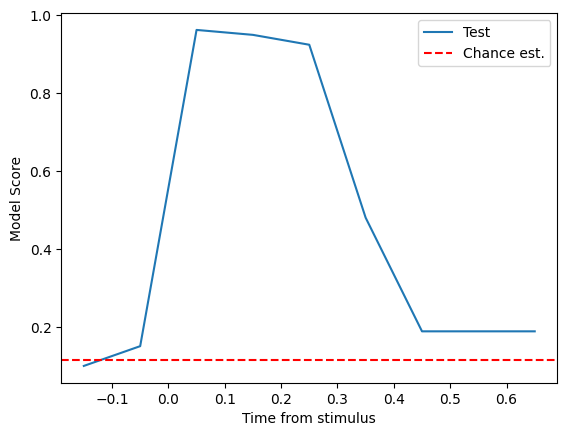

In [91]:
# Now Plot the score on the test data.
fig,ax = plt.subplots()
ax.plot(bins[:-1]+.05,score_test,label = 'Test')
ax.axhline(np.mean(chance),linestyle = '--',label = 'Chance est.',c = 'r')
ax.legend()
ax.set_xlabel('Time from stimulus')
ax.set_ylabel('Model Score')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Remember how we made such a big deal about splitting our data before? The importance of doing this becomes especially visible now that we have moved to the high dimensional, many neuron case. Because the dimensionality here is so high, models tend to do very, very well at predicting the data they were trained on. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Plot the testing and training data scores </h3> 

How does it compare? How does it compare to our chance estimate?


Text(0, 0.5, 'Model Score')

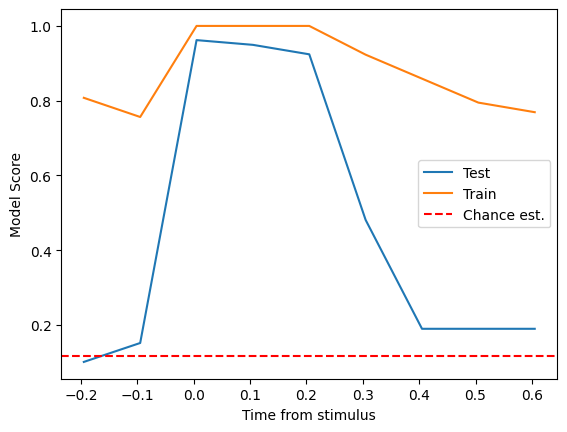

In [92]:
fig,ax = plt.subplots()
ax.plot(bins[:-1]+bin_size/2,score_test,label = 'Test')
plt.plot(bins[:-1]+bin_size/2,score_train,label = 'Train')

ax.axhline(np.mean(chance_est),linestyle = '--',label = 'Chance est.',c = 'r')
ax.legend()
ax.set_xlabel('Time from stimulus')
ax.set_ylabel('Model Score')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### 3.2 Cross validation

So far, we have seen only a single train/test split for each dataset. However, it is often useful to split your data multiple times. Depending on how you do this, it can allow you to do more fine grained characterization of either the variability or (depending on how you split) time course of what you are decoding.

To make this easy, <b>sklearn</b> includes a cross_validate function that automates much of what you could achieve yourself using a for loop. Its default is to do 5-fold cross validation. This means that the data is split in 5ths. 5 models are then fit, each with 4/5 of the data for training and the remaining 1/5 for testing. 

Lets try it here for 0-100 ms.

Note: There is nothing special about the number 5- you can use n-fold cross validation as suits your question. In the extreme case, you can use "Leave-one-out" cross validation, where n= number of samples. 


In [95]:
from sklearn.model_selection import cross_validate
cross_validate(LinearSVC(),storage[:,:,3].T,trial_id)

{'fit_time': array([0.09090734, 0.09429383, 0.08825469, 0.1014142 , 0.07284164]),
 'score_time': array([0.0010283 , 0.00102472, 0.00096369, 0.00117254, 0.00101256]),
 'test_score': array([0.82830385, 0.94068678, 0.95317378, 0.96770833, 0.9625    ])}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now, we can loop through to get a sense of our decoder variance over time. This effectivly allows us to draw errorbars on our decoder!


In [96]:
n_cross = 5
scores = np.empty([len(bins)-1,n_cross])       

for ii in range(len(bins)-1):
    # Find the number of spikes in the selected window
    X = storage[:,stimulus_change_number==change_number,ii].T
    # And the trial identity for each of the selected stimuli
    y = trial_id[stimulus_change_number==change_number]
    
    scores[ii,:] = cross_validate(LinearSVC(),X,y,cv = n_cross)['test_score']


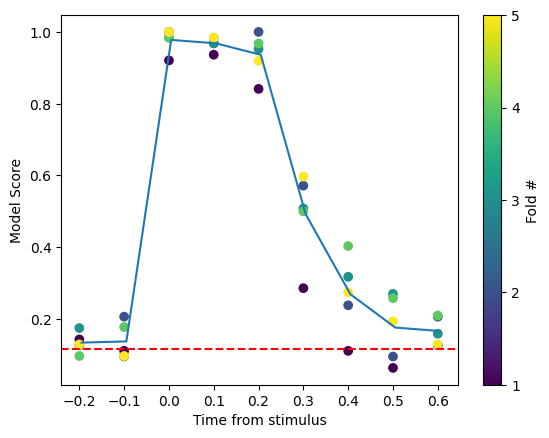

In [97]:
fig,ax = plt.subplots()
median_score = []
for ii in range(len(bins)-1):
    px = plt.scatter([bins[ii]]*(n_cross),scores[ii,:],c = [1,2,3,4,5])
    median_score.append(np.mean(scores[ii,:]))
plt.plot(bins[:-1]+bin_size/2,median_score)
ax.axhline(np.mean(chance_est),linestyle = '--',label = 'Chance est.',c = 'r')
ax.set_xlabel('Time from stimulus')
ax.set_ylabel('Model Score')
cbar = plt.colorbar(px)
cbar.set_ticks([1,2,3,4,5])
cbar.set_label('Fold #')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### A couple quick notes: 
### 3.4 firing rates
Lets quickly look at the distribution of maximum firing rates for our VISp units.

In [85]:
rates = storage[:,:,3].T

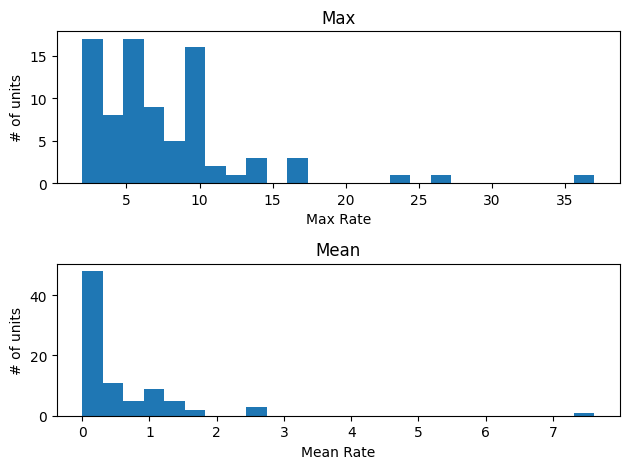

In [86]:

fig,ax = plt.subplots(nrows = 2)
ax[0].hist(np.max(rates,axis=0),25)
ax[0].set_xlabel('Max Rate')
ax[0].set_ylabel('# of units')
ax[0].set_title('Max')

ax[1].hist(np.mean(rates,axis=0),25)
ax[1].set_xlabel('Mean Rate')
ax[1].set_ylabel('# of units')
ax[1].set_title('Mean')

fig.tight_layout()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There is a danger here: depending on how you do you decoding, the high firing rate neurons could end up caring far more import than the low rate neurons.

A common solution to (1) center our data around zero by subtracting the mean and (2) normalize the variance by dividing by the standard deviation. In other words, we need to "Z-score" our data or "Standardize" it. 

$ \vec{x_{rescaled}} = \frac{\vec{x}-mean(x)}{stdev(x)}$

<b>Sklearn</b> provides a handy interface to do this using the "<b>StandardScaler</b>."

In [93]:
from sklearn.preprocessing import StandardScaler


In [94]:
S = StandardScaler()
rates_rescaled = S.fit_transform(rates)

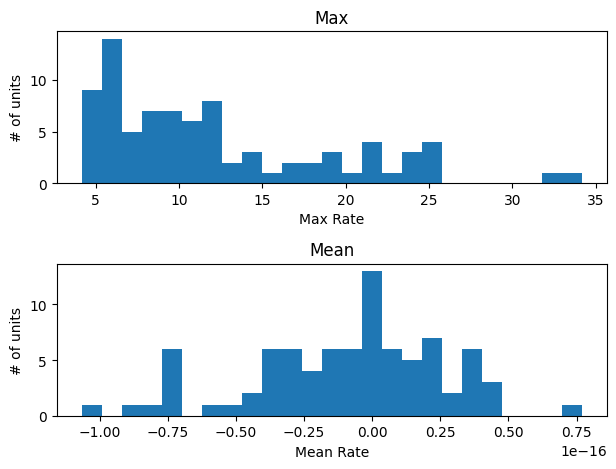

In [95]:
fig,ax = plt.subplots(nrows = 2)
ax[0].hist(np.max(rates_rescaled,axis=0),25)
ax[0].set_xlabel('Max Rate')
ax[0].set_ylabel('# of units')
ax[0].set_title('Max')

ax[1].hist(np.mean(rates_rescaled,axis=0),25)
ax[1].set_xlabel('Mean Rate')
ax[1].set_ylabel('# of units')
ax[1].set_title('Mean')

fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### BUT WAIT!

If this scaling was such a risk, why have we made it this far into the workshop without worrying about it?

It turns out that linear models are one of the cases where rescaling will not change behavior of our model. Rescaling will, of course, change the weights fit by the linear model. But, because Z-scoring is itself a linear operation, it wont impact the loss function or prediction. 

In [90]:
mdl = cross_validate(LinearSVC(),rates,stim_id)
print(mdl['test_score'])

mdl_rescaled = cross_validate(LinearSVC(),rates_rescaled,stim_id)
print(mdl_rescaled['test_score'])

[0.82830385 0.94068678 0.95317378 0.96770833 0.9625    ]
[0.81789802 0.93340271 0.94901145 0.965625   0.95520833]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### So...Should I rescale?

It depends. In many cases (like here!), it won't matter. 

However, there are cases where it can make a big difference. Rescaling is, for example, an essential part of principle components analysis- without it large values would dominate the resulting PCs.

Even if rescaling won't change the predictions of your model, it can make it easier to understand. Model weights will scale with firing rate. As a result, if you want to compare the impacts of different units with different weight on your linear model, rescaling can make these weights interpretable.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### A few quick notes: 
### 3.5 Population size impacts decoding

Up till now, we seen decoding with both a single neuron, and our entire V1 population.

As it turns out, there is a lot of space in the middle of these two questions.

In [98]:
# The random library is useful for sub selecting data
import random

# Here is an example of sampling, without replacement, from a set of indicies.
idx_list = list(np.arange(0,len(this_structure_units_table)))
samples = random.sample(idx_list,6)
subset  = np.array(samples).astype(int)
print(subset)

[58 45  4 71 35 41]


In [99]:
# number of neuron sets to grab
n_selections = 25
# number of neurons per set.
n_neurons = np.arange(1,len(this_structure_units_table),1)

# Storage for our model scores
scores = np.zeros([n_selections,len(n_neurons)])

# Choose the window 0-100ms after the stimulus
X = storage[:,stimulus_change_number==change_number,3].T
# And the trial identity for each of the selected stimuli
y = trial_id[stimulus_change_number==change_number]

# Loop through nuerons and subsets
for nn,neuron_count in enumerate(n_neurons):
    for ii in range(n_selections):
        samples = random.sample(idx_list,neuron_count)
        subset  = np.array(samples).astype(int)
        scores[ii,nn] = np.mean(cross_validate(LinearSVC(),X[:,subset],y,cv = 3)['test_score'])



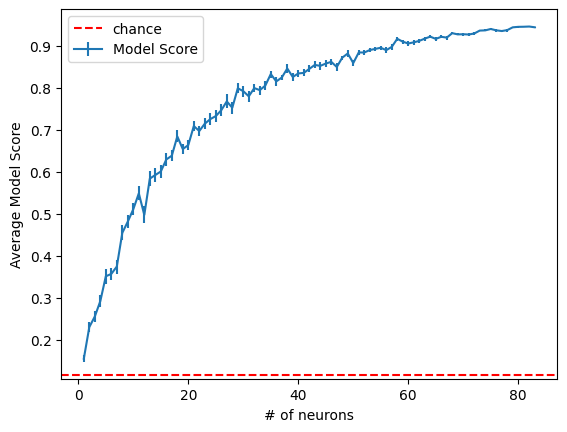

In [100]:
# find the mean and standard error of the mean for each neuron number
means = np.mean(scores,axis =0)
st_err = np.std(scores,axis = 0)/np.sqrt(n_selections)
fig,ax = plt.subplots()

ax.errorbar(n_neurons,
             means,
             yerr = st_err,
           label = 'Model Score')
ax.set_xlabel('# of neurons')
ax.set_ylabel('Average Model Score')
ax.axhline(chance,c = 'r',linestyle = '--',label = 'chance')
ax.legend()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 4.0 Whats next?

So far, we have seen that visual cortex encodes image identity in a visual task.

This, in and of itself, may not be that surprising to you. But as you have seen, decoders are a useful tool in understanding the dynamics of a population - we have used them to understand the time course of visual responses, as well as to understand how broadly distributed the visual code might be.

Now, lets try moving beyond image identity. This is, after all, a change detection task. Even though "change" images are drawn from the same set as the non-change images, can we differentiate change image presentations? 

To answer this, we can use the same "storage" matrix that we created before- its just a matter of changing 'y' class labels that we are decoding.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">

<h3> Try decoding change images. </h3> 

Can you plot the timecourse of change encoding?


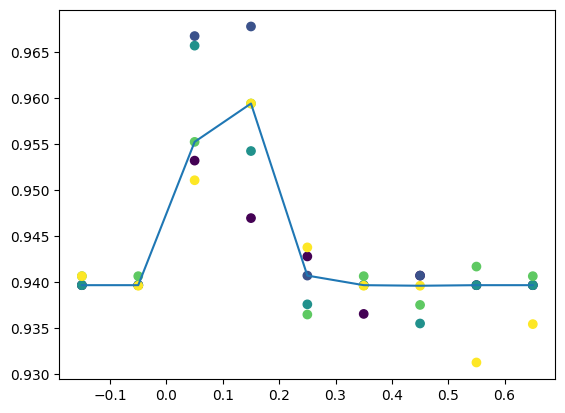

In [98]:
# Here is some code to get things started
fig,ax = plt.subplots()
median_score = np.zeros(len(bins)-1)
for ii in range(len(bins)-1):
    X = storage[:,:,ii].T
    y = active_stimuli.is_change.values
    ...
    fits = cross_validate(LinearSVC(),X,y,)
    scores = fits['test_score']
    ax.scatter([bins[ii]+np.median(np.diff(bins))/2]*n_cross,scores,c = [0,1,2,3,4])
    median_score[ii] = np.median(scores)
plt.plot(bins[:-1]+np.median(np.diff(bins))/2,median_score)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> How did you do? A little too well? </h3> 

Lets see if we can figure out what went wrong here

In [99]:
# Wait...what why are we doing so well.
prob_of_no_change = 1-np.sum(stimuli.is_change)/len(stimuli)
print('Success rate if you always guessed no: ' + str(prob_of_no_change))

Success rate if you always guessed no: 0.9400374765771393


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

In cases with very uneven sampling, the 'balanced' option for the Linear SVC can be very helpful!

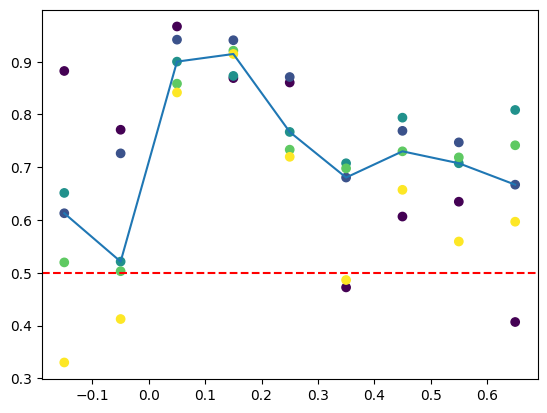

In [108]:
# Decode somethings else.
fig,ax = plt.subplots()
median_score = []
for ii in range(len(bins)-1):
    scores = cross_validate(LinearSVC(class_weight='balanced'),storage[:,:,ii].T,active_stimuli.is_change.values,)
    scores = scores['test_score']
    ax.scatter([bins[ii]+np.median(np.diff(bins))/2]*n_cross,scores,c = [0,1,2,3,4])
    median_score.append(np.median(scores))
ax.plot(bins[:-1]+np.median(np.diff(bins))/2,median_score)
ax.axhline(.5,linestyle = '--',c = 'r')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# 4.1 Closing thoughts.

This workshop has focused on decoding and how to assess your decoding. Here, we largely used cross validation to assess how well a model was doing across nominally homogenous block of trials. But what we are really asking with cross validation is "how well does my model do on data it hasn't seen before." 

As you saw in Shawn's talk this morning, however, mice and mouse behavior are often far from homogenous. 

It is often useful to fit a model in one condition and test in another- this is a way to assess if population encoding has changed. Hold on to this idea - we will see it again later this afternoon!

